**AIVLE School 미니프로젝트**
### **공공데이터를 활용한 <span style="color:darkgreen">미세먼지 농도</span> 예측**
---

#### **<span style="color:red">[미션 안내]</span>**
* 개인 미션: 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요. <br> ([1-1]부터 [1-2]까지, [2-1]부터 [2-8]까지, [3-1]부터 [3-2]까지 필수 수행, [4-1]부터 선택 수행)
* 조별 미션: 개인 미션 수행한 내용에 대해 토론하여 발표 준비를 해주세요.

#### **<span style="color:red">[데이터 설명]</span>**

* 학습 데이터
    * air_2021.csv : 2021년 미세먼지 데이터
    * weather_2021.csv : 2021년 날씨 데이터
* 테스트 데이터
    * air_2022.csv : 2022년 미세먼지 데이터
    * weather_2022.csv : 2022년 날씨 데이터

# [Step 1] 탐색적 데이터 분석

In [1]:
# 필요한 라이브러리 설치 및 임포트
!pip install pandas

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# 모든 행과 열을 출력하도록 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호가 제대로 표시되도록 하는 설정
plt.rcParams['axes.unicode_minus'] = False

---

#### **<span style="color:blue">[1-1] air_21, air_22, weather_21, weather_22 데이터 로딩</span>**

In [2]:
# 데이터 로딩

air_21 = pd.read_csv("air_2021.csv", sep=',', index_col = 0, encoding = 'utf-8' )
air_22 = pd.read_csv("air_2022.csv", sep=',', index_col = 0, encoding = 'utf-8' )
weather_21 = pd.read_csv("weather_2021.csv", sep = ',', encoding='cp949')
weather_22 = pd.read_csv("weather_2022.csv", sep = ',', encoding='cp949')

FileNotFoundError: ignored

In [ ]:
air_21.tail(24)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
8736,서울 종로구,도시대기,111123,종로구,2021093001,0.003,0.4,0.004,0.019,13.0,6.0,서울 종로구 종로35가길 19
8737,서울 종로구,도시대기,111123,종로구,2021093002,0.003,0.4,0.005,0.018,13.0,7.0,서울 종로구 종로35가길 19
8738,서울 종로구,도시대기,111123,종로구,2021093003,0.003,0.4,0.006,0.015,14.0,11.0,서울 종로구 종로35가길 19
8739,서울 종로구,도시대기,111123,종로구,2021093004,0.003,0.4,0.006,0.013,15.0,10.0,서울 종로구 종로35가길 19
8740,서울 종로구,도시대기,111123,종로구,2021093005,0.003,0.4,0.008,0.013,14.0,9.0,서울 종로구 종로35가길 19
8741,서울 종로구,도시대기,111123,종로구,2021093006,0.002,0.4,0.007,0.014,11.0,7.0,서울 종로구 종로35가길 19
8742,서울 종로구,도시대기,111123,종로구,2021093007,0.003,0.4,0.004,0.018,14.0,8.0,서울 종로구 종로35가길 19
8743,서울 종로구,도시대기,111123,종로구,2021093008,0.003,0.4,0.003,0.018,11.0,6.0,서울 종로구 종로35가길 19
8744,서울 종로구,도시대기,111123,종로구,2021093009,0.003,0.4,0.005,0.019,11.0,4.0,서울 종로구 종로35가길 19
8745,서울 종로구,도시대기,111123,종로구,2021093010,0.003,0.4,0.009,0.018,8.0,4.0,서울 종로구 종로35가길 19


In [ ]:
weather_21.head(24)

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,NaN,68,NaN,2.2,-13.5,1016.4,NaN,1027.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,NaN,69,NaN,2.1,-13.7,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,NaN,70,NaN,2.1,-13.7,1016.8,NaN,1028.1,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,NaN,71,NaN,2.2,-13.5,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,NaN,72,NaN,2.1,-13.8,1015.6,NaN,1026.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5
5,108,서울,2021-01-01 06:00,-9.7,NaN,NaN,NaN,2.0,NaN,50.0,NaN,75,NaN,2.2,-13.3,1015.4,NaN,1026.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,7.0,7,Sc,12.0,2000,NaN,NaN,-7.4,NaN,-1.4,-1.1,0.2,1.5
6,108,서울,2021-01-01 07:00,-9.3,NaN,NaN,NaN,1.6,NaN,50.0,NaN,71,NaN,2.2,-13.5,1015.6,NaN,1026.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,6.0,6,Sc,16.0,2000,NaN,NaN,-6.8,NaN,-1.4,-1.1,0.2,1.5
7,108,서울,2021-01-01 08:00,-9.3,NaN,NaN,NaN,1.6,NaN,50.0,NaN,72,NaN,2.2,-13.4,1015.8,NaN,1027.1,NaN,0.0,NaN,0.00,NaN,NaN,NaN,1.0,1,Sc,18.0,2000,NaN,NaN,-7.3,NaN,-1.4,-1.1,0.1,1.5
8,108,서울,2021-01-01 09:00,-8.6,NaN,NaN,NaN,2.5,NaN,20.0,NaN,74,NaN,2.4,-12.4,1016.1,NaN,1027.4,NaN,0.6,NaN,0.27,NaN,NaN,NaN,1.0,1,Sc,18.0,2000,NaN,NaN,-6.2,NaN,-1.4,-1.2,0.1,1.4
9,108,서울,2021-01-01 10:00,-6.1,NaN,NaN,NaN,1.1,NaN,50.0,NaN,68,NaN,2.6,-11.0,1016.4,NaN,1027.6,NaN,1.0,NaN,0.76,NaN,NaN,NaN,1.0,1,Sc,10.0,2000,NaN,NaN,-3.4,NaN,-1.2,-1.1,0.1,1.4


#### **<span style="color:blue">[1-2] 필요한 데이터 분석 진행 </span>**

In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
# head, tail, info, plot을 활용한 시각화 등 진행
air_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB


In [ ]:
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8759 non-null   int64  
 1   지점명            8759 non-null   object 
 2   일시             8759 non-null   object 
 3   기온(°C)         8759 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        949 non-null    float64
 6   강수량 QC플래그      1763 non-null   float64
 7   풍속(m/s)        8757 non-null   float64
 8   풍속 QC플래그       2 non-null      float64
 9   풍향(16방위)       8757 non-null   float64
 10  풍향 QC플래그       2 non-null      float64
 11  습도(%)          8759 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8759 non-null   float64
 14  이슬점온도(°C)      8759 non-null   float64
 15  현지기압(hPa)      8759 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8759 non-null   float64
 18  해면기압 QC플

# [Step 2] 데이터 전처리

#### **<span style="color:blue">[2-1] air_21, air_22 의 '측정일시'를 활용하여 'time' 변수 생성</span>**

* air_21, air_22  각각 '측정일시'를 활용하여 'time'변수 생성
    * 참고: 미세먼지 데이터는 1시-24시, 날씨 데이터는 0시-23시로 구성되어 있습니다. [2-3]에서 미세먼지와 날씨 데이터를 time 기준으로 합치려면 기준이 동일해야 합니다. 미세먼지 데이터에서 time 변수 생성 시 이를 미리 고려(예: air_21['측정일시'] -1)하세요.
* time 변수를 pd.to_datetime으로 데이터 타입 변경
    * 참고: format = '%Y%m%d%H'

In [ ]:
# air_21의 '측정일시'를 활용하여 'time' 변수 생성
from datetime import timedelta
air_21['time'] = air_21['측정일시']
air_21['time'] = air_21['time'] - 1 # Hour 24떄문에
air_21['time'] = pd.to_datetime(air_21['time'].astype(str), format='%Y%m%d%H')
air_21['time'] = air_21['time'] + timedelta(hours=1)

In [ ]:
air_21.head(24)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19,2021-10-01 01:00:00
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19,2021-10-01 02:00:00
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19,2021-10-01 03:00:00
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19,2021-10-01 04:00:00
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19,2021-10-01 05:00:00
5,서울 종로구,도시대기,111123,종로구,2021100106,0.003,0.5,0.002,0.025,22.0,14.0,서울 종로구 종로35가길 19,2021-10-01 06:00:00
6,서울 종로구,도시대기,111123,종로구,2021100107,0.003,0.5,0.002,0.024,25.0,14.0,서울 종로구 종로35가길 19,2021-10-01 07:00:00
7,서울 종로구,도시대기,111123,종로구,2021100108,0.003,0.5,0.005,0.023,24.0,14.0,서울 종로구 종로35가길 19,2021-10-01 08:00:00
8,서울 종로구,도시대기,111123,종로구,2021100109,0.003,0.5,0.011,0.020,23.0,12.0,서울 종로구 종로35가길 19,2021-10-01 09:00:00
9,서울 종로구,도시대기,111123,종로구,2021100110,0.003,0.6,0.026,0.016,40.0,22.0,서울 종로구 종로35가길 19,2021-10-01 10:00:00


In [ ]:
air_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지역      8760 non-null   object        
 1   망       8760 non-null   object        
 2   측정소코드   8760 non-null   int64         
 3   측정소명    8760 non-null   object        
 4   측정일시    8760 non-null   int64         
 5   SO2     8648 non-null   float64       
 6   CO      8680 non-null   float64       
 7   O3      8663 non-null   float64       
 8   NO2     8680 non-null   float64       
 9   PM10    8655 non-null   float64       
 10  PM25    8663 non-null   float64       
 11  주소      8760 non-null   object        
 12  time    8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 958.1+ KB


In [ ]:
# air_22의 '측정일시'를 활용하여 'time' 변수 생성
air_22['time'] = air_22['측정일시']
air_22['time'] = air_22['time'] - 1 # Hour 24떄문에
air_22['time'] = pd.to_datetime(air_22['time'].astype(str), format='%Y%m%d%H')
air_22['time'] = air_22['time'] + timedelta(hours=1)

In [ ]:
air_22.head(24)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19,2022-01-01 01:00:00
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19,2022-01-01 02:00:00
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19,2022-01-01 03:00:00
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19,2022-01-01 04:00:00
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19,2022-01-01 05:00:00
5,서울 종로구,도시대기,111123,종로구,2022010106,0.003,0.6,0.002,0.045,19.0,11.0,서울 종로구 종로35가길 19,2022-01-01 06:00:00
6,서울 종로구,도시대기,111123,종로구,2022010107,0.003,0.6,0.002,0.044,24.0,14.0,서울 종로구 종로35가길 19,2022-01-01 07:00:00
7,서울 종로구,도시대기,111123,종로구,2022010108,0.003,0.6,0.002,0.042,27.0,16.0,서울 종로구 종로35가길 19,2022-01-01 08:00:00
8,서울 종로구,도시대기,111123,종로구,2022010109,0.003,0.6,0.006,0.038,26.0,12.0,서울 종로구 종로35가길 19,2022-01-01 09:00:00
9,서울 종로구,도시대기,111123,종로구,2022010110,0.004,0.5,0.019,0.024,22.0,10.0,서울 종로구 종로35가길 19,2022-01-01 10:00:00


In [ ]:
air_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지역      2160 non-null   object        
 1   망       2160 non-null   object        
 2   측정소코드   2160 non-null   int64         
 3   측정소명    2160 non-null   object        
 4   측정일시    2160 non-null   int64         
 5   SO2     2139 non-null   float64       
 6   CO      2139 non-null   float64       
 7   O3      2139 non-null   float64       
 8   NO2     2139 non-null   float64       
 9   PM10    2122 non-null   float64       
 10  PM25    2135 non-null   float64       
 11  주소      2160 non-null   object        
 12  time    2160 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 236.2+ KB


---

#### **<span style="color:blue">[2-2] weather_21, weather_22 의 '일시'를 활용하여 'time' 변수 생성</span>**

* weather_21, weather_22 의 '일시'를 활용하여 'time'변수 생성
* time 변수를 pd.to_datetime으로 데이터 타입 변경

In [ ]:
# weather_21 '일시'를 활용하여 'time' 변수 생성
weather_21['time'] = pd.to_datetime(weather_21['일시'])

In [ ]:
weather_21.head(24)

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,NaN,68,NaN,2.2,-13.5,1016.4,NaN,1027.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6,2021-01-01 01:00:00
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,NaN,69,NaN,2.1,-13.7,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6,2021-01-01 02:00:00
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,NaN,70,NaN,2.1,-13.7,1016.8,NaN,1028.1,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6,2021-01-01 03:00:00
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,NaN,71,NaN,2.2,-13.5,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5,2021-01-01 04:00:00
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,NaN,72,NaN,2.1,-13.8,1015.6,NaN,1026.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5,2021-01-01 05:00:00
5,108,서울,2021-01-01 06:00,-9.7,NaN,NaN,NaN,2.0,NaN,50.0,NaN,75,NaN,2.2,-13.3,1015.4,NaN,1026.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,7.0,7,Sc,12.0,2000,NaN,NaN,-7.4,NaN,-1.4,-1.1,0.2,1.5,2021-01-01 06:00:00
6,108,서울,2021-01-01 07:00,-9.3,NaN,NaN,NaN,1.6,NaN,50.0,NaN,71,NaN,2.2,-13.5,1015.6,NaN,1026.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,6.0,6,Sc,16.0,2000,NaN,NaN,-6.8,NaN,-1.4,-1.1,0.2,1.5,2021-01-01 07:00:00
7,108,서울,2021-01-01 08:00,-9.3,NaN,NaN,NaN,1.6,NaN,50.0,NaN,72,NaN,2.2,-13.4,1015.8,NaN,1027.1,NaN,0.0,NaN,0.00,NaN,NaN,NaN,1.0,1,Sc,18.0,2000,NaN,NaN,-7.3,NaN,-1.4,-1.1,0.1,1.5,2021-01-01 08:00:00
8,108,서울,2021-01-01 09:00,-8.6,NaN,NaN,NaN,2.5,NaN,20.0,NaN,74,NaN,2.4,-12.4,1016.1,NaN,1027.4,NaN,0.6,NaN,0.27,NaN,NaN,NaN,1.0,1,Sc,18.0,2000,NaN,NaN,-6.2,NaN,-1.4,-1.2,0.1,1.4,2021-01-01 09:00:00
9,108,서울,2021-01-01 10:00,-6.1,NaN,NaN,NaN,1.1,NaN,50.0,NaN,68,NaN,2.6,-11.0,1016.4,NaN,1027.6,NaN,1.0,NaN,0.76,NaN,NaN,NaN,1.0,1,Sc,10.0,2000,NaN,NaN,-3.4,NaN,-1.2,-1.1,0.1,1.4,2021-01-01 10:00:00


In [ ]:
#  weather_22 '일시'를 활용하여 'time' 변수 생성
weather_22['time'] = pd.to_datetime(weather_22['일시'])

In [ ]:
weather_22.head(24)

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,NaN,41,NaN,1.3,-19.4,1021.9,NaN,1033.2,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0,2022-01-01 00:00:00
1,108,서울,2022-01-01 01:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,NaN,42,NaN,1.3,-19.7,1022.2,NaN,1033.6,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0,2022-01-01 01:00:00
2,108,서울,2022-01-01 02:00,-9.5,NaN,NaN,NaN,1.2,NaN,270,NaN,43,NaN,1.3,-19.7,1022.3,NaN,1033.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0,2022-01-01 02:00:00
3,108,서울,2022-01-01 03:00,-9.3,NaN,NaN,NaN,1.4,NaN,290,NaN,46,NaN,1.4,-18.8,1022.6,NaN,1034.0,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0,2022-01-01 03:00:00
4,108,서울,2022-01-01 04:00,-9.6,NaN,NaN,NaN,1.7,NaN,340,NaN,48,NaN,1.4,-18.5,1021.9,NaN,1033.3,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0,2022-01-01 04:00:00
5,108,서울,2022-01-01 05:00,-9.7,NaN,NaN,NaN,0.8,NaN,270,NaN,51,NaN,1.5,-17.9,1022.0,NaN,1033.4,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.7,NaN,-1.5,-1.4,-0.3,1.0,2022-01-01 05:00:00
6,108,서울,2022-01-01 06:00,-9.8,NaN,NaN,NaN,1.9,NaN,20,NaN,53,NaN,1.5,-17.6,1021.7,NaN,1033.1,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.6,-1.4,-0.3,0.9,2022-01-01 06:00:00
7,108,서울,2022-01-01 07:00,-10.1,NaN,NaN,NaN,1.9,NaN,50,NaN,55,NaN,1.6,-17.4,1021.6,NaN,1033.0,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.6,-1.5,-0.3,0.9,2022-01-01 07:00:00
8,108,서울,2022-01-01 08:00,-10.2,NaN,NaN,NaN,2.5,NaN,20,NaN,56,NaN,1.6,-17.3,1021.8,NaN,1033.2,NaN,0.0,NaN,0.00,NaN,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.4,NaN,-1.7,-1.5,-0.3,0.9,2022-01-01 08:00:00
9,108,서울,2022-01-01 09:00,-9.1,NaN,NaN,NaN,2.1,NaN,50,NaN,56,NaN,1.7,-16.2,1021.9,NaN,1033.3,NaN,1.0,NaN,0.30,NaN,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-6.4,NaN,-1.7,-1.6,-0.4,0.9,2022-01-01 09:00:00


---

#### **<span style="color:blue">[2-3] 'time' 기준으로 데이터 합치기</span>**

* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보세요.
    * df_21에는 'time' 기준으로 21년도 미세먼지, 날씨 데이터를 합쳐보세요.
    * df_22에는 'time' 기준으로 22년도 미세먼지, 날씨 데이터를 합쳐보세요.

In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
df_21 = pd.merge(air_21, weather_21, how='inner', on='time')
df_22 = pd.merge(air_22, weather_22, how='inner', on='time')

In [ ]:
df_21.head(24)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19,2021-10-01 01:00:00,108,서울,2021-10-01 01:00,18.7,NaN,NaN,NaN,1.0,NaN,20.0,NaN,85,NaN,18.3,16.1,998.8,NaN,1008.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,17.4,NaN,22.1,22.0,22.5,22.9
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19,2021-10-01 02:00:00,108,서울,2021-10-01 02:00,18.3,NaN,NaN,NaN,0.3,NaN,0.0,NaN,89,NaN,18.6,16.4,998.9,NaN,1008.8,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,17.2,NaN,21.8,21.8,22.4,22.8
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19,2021-10-01 03:00:00,108,서울,2021-10-01 03:00,17.7,NaN,NaN,NaN,2.0,NaN,20.0,NaN,92,NaN,18.5,16.3,998.1,NaN,1008.1,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,17.0,NaN,21.6,21.6,22.2,22.8
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19,2021-10-01 04:00:00,108,서울,2021-10-01 04:00,17.4,NaN,NaN,NaN,1.0,NaN,50.0,NaN,91,NaN,18.1,15.9,997.9,NaN,1007.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,16.5,NaN,21.3,21.4,22.0,22.7
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19,2021-10-01 05:00:00,108,서울,2021-10-01 05:00,17.2,NaN,NaN,NaN,1.3,NaN,270.0,NaN,94,NaN,18.4,16.2,998.4,NaN,1008.4,NaN,NaN,9.0,NaN,9.0,NaN,NaN,4.0,0,Ci,NaN,1995,NaN,NaN,16.6,NaN,21.1,21.2,21.9,22.6
5,서울 종로구,도시대기,111123,종로구,2021100106,0.003,0.5,0.002,0.025,22.0,14.0,서울 종로구 종로35가길 19,2021-10-01 06:00:00,108,서울,2021-10-01 06:00,17.0,NaN,NaN,NaN,1.9,NaN,360.0,NaN,94,NaN,18.2,16.0,999.2,NaN,1009.2,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,1910,NaN,NaN,16.5,NaN,21.0,21.0,21.7,22.5
6,서울 종로구,도시대기,111123,종로구,2021100107,0.003,0.5,0.002,0.024,25.0,14.0,서울 종로구 종로35가길 19,2021-10-01 07:00:00,108,서울,2021-10-01 07:00,17.0,NaN,NaN,NaN,0.8,NaN,290.0,NaN,95,NaN,18.3,16.1,1000.4,NaN,1010.4,NaN,0.0,NaN,0.03,NaN,NaN,NaN,7.0,2,AcCi,45.0,2000,NaN,NaN,16.9,NaN,20.8,20.8,21.6,22.4
7,서울 종로구,도시대기,111123,종로구,2021100108,0.003,0.5,0.005,0.023,24.0,14.0,서울 종로구 종로35가길 19,2021-10-01 08:00:00,108,서울,2021-10-01 08:00,17.5,NaN,NaN,NaN,3.8,NaN,290.0,NaN,93,NaN,18.5,16.3,1002.0,NaN,1012.0,NaN,0.0,NaN,0.27,NaN,NaN,NaN,8.0,6,ScAc,5.0,2000,NaN,NaN,19.1,NaN,20.8,20.7,21.4,22.3
8,서울 종로구,도시대기,111123,종로구,2021100109,0.003,0.5,0.011,0.020,23.0,12.0,서울 종로구 종로35가길 19,2021-10-01 09:00:00,108,서울,2021-10-01 09:00,19.8,NaN,NaN,NaN,2.6,NaN,90.0,NaN,86,NaN,19.7,17.3,999.4,NaN,1009.3,NaN,0.6,NaN,0.97,NaN,NaN,NaN,5.0,5,Ac,45.0,2000,NaN,NaN,23.4,NaN,20.9,20.7,21.3,22.2
9,서울 종로구,도시대기,111123,종로구,2021100110,0.003,0.6,0.026,0.016,40.0,22.0,서울 종로구 종로35가길 19,2021-10-01 10:00:00,108,서울,2021-10-01 10:00,21.4,NaN,NaN,NaN,3.0,NaN,90.0,NaN,76,NaN,19.2,16.9,999.3,NaN,1009.2,NaN,1.0,NaN,1.81,NaN,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,27.0,NaN,21.4,20.9,21.3,22.1


In [ ]:
df_22.tail()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
2154,서울 종로구,도시대기,111123,종로구,2022033119,0.002,0.4,0.044,0.010,10.0,9.0,서울 종로구 종로35가길 19,2022-03-31 19:00:00,108,서울,2022-03-31 19:00,12.3,NaN,NaN,NaN,2.9,NaN,340,NaN,47,NaN,6.7,1.2,1013.4,NaN,1023.8,NaN,0.4,NaN,0.2,NaN,NaN,NaN,6,1,NaN,9.0,2000,NaN,NaN,10.0,NaN,12.6,11.8,11.0,10.2
2155,서울 종로구,도시대기,111123,종로구,2022033120,0.002,0.4,0.036,0.017,11.0,8.0,서울 종로구 종로35가길 19,2022-03-31 20:00:00,108,서울,2022-03-31 20:00,11.6,NaN,NaN,NaN,2.7,NaN,340,NaN,48,NaN,6.5,0.9,1014.6,NaN,1025.0,NaN,NaN,9.0,NaN,9.0,NaN,NaN,6,0,NaN,NaN,2000,NaN,NaN,8.9,NaN,12.2,11.6,11.0,10.3
2156,서울 종로구,도시대기,111123,종로구,2022033121,0.002,0.4,0.032,0.018,10.0,7.0,서울 종로구 종로35가길 19,2022-03-31 21:00:00,108,서울,2022-03-31 21:00,10.5,NaN,NaN,NaN,3.5,NaN,320,NaN,51,NaN,6.4,0.7,1015.4,NaN,1025.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,1,1,Sc,10.0,2000,NaN,NaN,7.8,NaN,11.8,11.4,11.0,10.4
2157,서울 종로구,도시대기,111123,종로구,2022033122,0.003,0.3,0.038,0.013,11.0,5.0,서울 종로구 종로35가길 19,2022-03-31 22:00:00,108,서울,2022-03-31 22:00,9.3,NaN,NaN,NaN,1.9,NaN,50,NaN,58,NaN,6.8,1.4,1016.4,NaN,1026.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,3,3,NaN,10.0,2000,NaN,NaN,7.3,NaN,11.4,11.1,10.9,10.5
2158,서울 종로구,도시대기,111123,종로구,2022033123,0.003,0.3,0.036,0.015,11.0,5.0,서울 종로구 종로35가길 19,2022-03-31 23:00:00,108,서울,2022-03-31 23:00,8.4,NaN,NaN,NaN,1.2,NaN,360,NaN,61,NaN,6.7,1.3,1016.9,NaN,1027.4,NaN,NaN,9.0,NaN,9.0,NaN,NaN,1,1,NaN,10.0,2000,NaN,NaN,6.7,NaN,11.0,10.8,10.8,10.5


---

In [ ]:
# df_21, df_22 'time'을 인덱스로 정의하고, sort_index를 통해 시간순 정렬

# 'time' 열을 인덱스로 설정
df_21.set_index('time', inplace=True)
df_22.set_index('time', inplace=True)

# 인덱스를 기준으로 정렬
df_21.sort_index(inplace=True)
df_22.sort_index(inplace=True)

In [ ]:
df_21.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,서울 종로구,도시대기,111123,종로구,2021010101,0.002,0.5,0.022,0.016,24.0,14.0,서울 종로구 종로35가길 19,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,NaN,68,NaN,2.2,-13.5,1016.4,NaN,1027.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
2021-01-01 02:00:00,서울 종로구,도시대기,111123,종로구,2021010102,0.002,0.6,0.018,0.020,25.0,14.0,서울 종로구 종로35가길 19,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,NaN,69,NaN,2.1,-13.7,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6
2021-01-01 03:00:00,서울 종로구,도시대기,111123,종로구,2021010103,0.002,0.6,0.013,0.025,27.0,16.0,서울 종로구 종로35가길 19,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,NaN,70,NaN,2.1,-13.7,1016.8,NaN,1028.1,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6
2021-01-01 04:00:00,서울 종로구,도시대기,111123,종로구,2021010104,0.003,0.6,0.011,0.027,23.0,13.0,서울 종로구 종로35가길 19,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,NaN,71,NaN,2.2,-13.5,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5
2021-01-01 05:00:00,서울 종로구,도시대기,111123,종로구,2021010105,0.003,0.6,0.008,0.032,24.0,14.0,서울 종로구 종로35가길 19,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,NaN,72,NaN,2.1,-13.8,1015.6,NaN,1026.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5


#### **<span style="color:blue">[2-5] 변수들의 결측치 처리</span>**

In [ ]:
# df_21 결측치 확인
df_21.isna().sum()

지역                  0
망                   0
측정소코드               0
측정소명                0
측정일시                0
SO2               112
CO                 80
O3                 97
NO2                80
PM10              105
PM25               97
주소                  0
지점                  0
지점명                 0
일시                  0
기온(°C)              0
기온 QC플래그         8759
강수량(mm)          7810
강수량 QC플래그        6996
풍속(m/s)             2
풍속 QC플래그         8757
풍향(16방위)            2
풍향 QC플래그         8757
습도(%)               0
습도 QC플래그         8759
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
현지기압 QC플래그       8759
해면기압(hPa)           0
해면기압 QC플래그       8759
일조(hr)           3968
일조 QC플래그         4791
일사(MJ/m2)        3968
일사 QC플래그         4791
적설(cm)           8380
3시간신적설(cm)       8730
전운량(10분위)           2
중하층운량(10분위)         0
운형(운형약어)         3812
최저운고(100m )      4212
시정(10m)             0
지면상태(지면상태코드)     8759
현상번호(국내식)        6634
지면온도(°C)            5
지면온도 QC플래그

In [ ]:
df_21.loc[(df_21.index.hour == 0) & (df_21['SO2'].isna()), 'SO2']

time
2021-07-21   NaN
2021-09-24   NaN
Name: SO2, dtype: float64

In [ ]:
# 'SO2'(아황산가스)의 결측치는 시(Hour)의 SO2의 최빈값으로 대체한다.
times = [time for time in range(0, 24, 1)]
for time in times:
    # ex) 0시에 해당하는 SO2의 최빈값을 찾는다.
    mode = df_21.loc[df_21.index.hour == time, 'SO2'].mode().iloc[0]
    df_21.loc[(df_21.index.hour == time) & (df_21['SO2'].isna()), 'SO2'] = mode

In [ ]:
# 'CO'(일산화탄스)의 결측치는 시(Hour)의 CO의 최빈값으로 대체한다.
for time in times:
    # ex) 0시에 해당하는 SO2의 최빈값을 찾는다.
    mode = df_21.loc[df_21.index.hour == time, 'CO'].mode().iloc[0]
    df_21.loc[(df_21.index.hour == time) & (df_21['CO'].isna()), 'CO'] = mode

In [ ]:
# 'O3'(오존)의 결측치는 시(Hour)의 O3의 최빈값으로 대체한다.
for time in times:
    # ex) 0시에 해당하는 O3의 최빈값을 찾는다.
    mode = df_21.loc[df_21.index.hour == time, 'O3'].mode().iloc[0]
    print(mode)
    df_21.loc[(df_21.index.hour == time) & (df_21['O3'].isna()), 'O3'] = mode

0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.003
0.003
0.01
0.042
0.029
0.049
0.044
0.033
0.044
0.031
0.027
0.002
0.002
0.002
0.002


In [ ]:
# 'NO2'(이산화질소)의 결측치는 시(Hour)의 NO2의 최빈값으로 대체한다.
for time in times:
    # ex) 0시에 해당하는 NO2의 최빈값을 찾는다.
    mode = df_21.loc[df_21.index.hour == time, 'NO2'].mode().iloc[0]
    print(mode)
    df_21.loc[(df_21.index.hour == time) & (df_21['NO2'].isna()), 'NO2'] = mode

0.01
0.008
0.007
0.007
0.008
0.01
0.014
0.011
0.016
0.019
0.018
0.011
0.009
0.01
0.011
0.011
0.012
0.012
0.016
0.017
0.013
0.018
0.016
0.015


In [ ]:
# 'PM10'의 결측치는 선형보간법을 이용해 주변 시간대의 'PM10'값으로 대체한다.
df_21['PM10'] = df_21['PM10'].interpolate(method='linear')

In [ ]:
# 'PM25'의 결측치는 선형보간법을 이용해 주변 시간대의 'PM10'값으로 대체한다.
df_21['PM25'] = df_21['PM25'].interpolate(method='linear')

In [ ]:
# 기온 QC 플래그는 열을 지운다.
df_21.drop('기온 QC플래그', axis=1, inplace=True)

In [ ]:
df_21.isna().sum()

지역                  0
망                   0
측정소코드               0
측정소명                0
측정일시                0
SO2                 0
CO                  0
O3                  0
NO2                 0
PM10                0
PM25                0
주소                  0
지점                  0
지점명                 0
일시                  0
기온(°C)              0
강수량(mm)          7810
강수량 QC플래그        6996
풍속(m/s)             2
풍속 QC플래그         8757
풍향(16방위)            2
풍향 QC플래그         8757
습도(%)               0
습도 QC플래그         8759
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
현지기압 QC플래그       8759
해면기압(hPa)           0
해면기압 QC플래그       8759
일조(hr)           3968
일조 QC플래그         4791
일사(MJ/m2)        3968
일사 QC플래그         4791
적설(cm)           8380
3시간신적설(cm)       8730
전운량(10분위)           2
중하층운량(10분위)         0
운형(운형약어)         3812
최저운고(100m )      4212
시정(10m)             0
지면상태(지면상태코드)     8759
현상번호(국내식)        6634
지면온도(°C)            5
지면온도 QC플래그       8735
5cm 지중온도(°

In [ ]:
# Chat GPT에 따르면 강수량(mm)이 NaN인 경우 때떄로 '0mm'인 것을 의미한다고 하기도 해서
# 강수량(mm)이 NaN이면 0.0으로 대체한다.
df_21.loc[df_21['강수량(mm)'].isna(), '강수량(mm)'] = 0.0

In [ ]:
# 강수량 QC 플래그 열은 삭제한다.
df_21.drop('강수량 QC플래그', axis=1, inplace=True)

In [ ]:
# 풍속(m/s)은 선형 보간법을 이용한다. 주변의 풍속(m/s)으로 대체한다.
df_21['풍속(m/s)'] = df_21['풍속(m/s)'].interpolate()

In [ ]:
# 풍속 QC 플래그 열은 삭제한다.
df_21.drop('풍속 QC플래그', axis=1, inplace=True)

In [ ]:
# 풍향(16방위)은 선형 보간법을 이용한다. 주변의 풍향(16방위)으로 대체한다.
df_21['풍향(16방위)'] = df_21['풍향(16방위)'].interpolate()

In [ ]:
# 풍향 QC플래그 열은 삭제한다.
df_21.drop('풍향 QC플래그', axis=1, inplace=True)

In [ ]:
# 습도 QC플래그 열은 삭제한다.
df_21.drop('습도 QC플래그', axis=1, inplace=True)

In [ ]:
# 현지기압 QC플래그 열은 삭제한다.
df_21.drop('현지기압 QC플래그', axis=1, inplace=True)

In [ ]:
# 해면기압 QC 플래그 열은 삭제한다.
df_21.drop('해면기압 QC플래그', axis=1, inplace=True)

In [ ]:
df_21.loc[df_21.index.hour == 0, '일조(hr)'].mode()

Series([], Name: 일조(hr), dtype: float64)

In [ ]:
# '보통 밤, 새벽에는 일조(hr)이 없고, 오전, 오후에 일조(hr)가 많으므로 그에 대한 처리를 하였다.
times = [time for time in range(0, 24, 1)]
for time in times:
    if time in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 21, 22, 23]:
        df_21.loc[(df_21.index.hour == time) & df_21['일조(hr)'].isna(), '일조(hr)'] = 0.0
    else:
        df_21.loc[(df_21.index.hour == time) & df_21['일조(hr)'].isna(), '일조(hr)'] = 1.0

In [ ]:
# '일조 QC플래그' 열은 삭제한다.
df_21.drop('일조 QC플래그', axis=1, inplace=True)

In [ ]:
# '보통 밤, 새벽에는 일사(MJ/m2)이 없고, 오전, 오후에 일사(MJ/m2)가 많으므로 그에 대한 처리를 하였다.
# 기본적으로 시(hour)에 대한 최빈값으로 결측치를 대체했으며, 최빈값이 여러개인 경우 최빈값의 평균을 구하여 결측치를 대체했다.
times = [time for time in range(0, 24, 1)]
for time in times:
    mode = df_21.loc[(df_21.index.hour == time), '일사(MJ/m2)'].mode()
    if len(mode) == 0:
        df_21.loc[(df_21.index.hour == time ) & (df_21['일사(MJ/m2)'].isna()), '일사(MJ/m2)'] = 0.0
    elif len(mode) == 1:
        df_21.loc[(df_21.index.hour == time ) & (df_21['일사(MJ/m2)'].isna()), '일사(MJ/m2)'] = mode.iloc[0]
    else:
        df_21.loc[(df_21.index.hour == time ) & (df_21['일사(MJ/m2)'].isna()), '일사(MJ/m2)'] = mode.mean()

In [ ]:
# '일사 QC플래그' 열은 삭제한다.
df_21.drop('일사 QC플래그', axis=1, inplace=True)

In [ ]:
# 일적설량(cm)이 NaN이면 0.0으로 처리한다.
df_21.loc[df_21['적설(cm)'].isna(), '적설(cm)'] = 0.0

In [ ]:
# 3시간신적설(cm)는 열에서 지운다.
df_21.drop('3시간신적설(cm)', axis=1, inplace=True)

In [ ]:
# 전운량(10분위)는 선형 보간법을 이용해 주변 전운량(10분위)로 채운다.
df_21['전운량(10분위)'] = df_21['전운량(10분위)'].interpolate(method='linear')

In [ ]:
df_21['운형(운형약어)'].unique()

array([nan, 'Sc', 'ScAcCi', 'ScCi', 'Ci', 'ScAs', 'StNs', 'Cs', 'AcCs',
       'AcCi', 'ScAc', 'St', 'Cc', 'Ac', 'As', 'ScCs', 'CuSc', 'StAs',
       'CsCi', 'CbStNs', 'AcCc', 'ScCc', 'CuScNs', 'CuScAc', 'CuAc',
       'CuCi', 'CuAs', 'CuScAs', 'Cu', 'CuScAcCi', 'CuScCi', 'CbCu',
       'CbScNs', 'CuScCc', 'CuScCcCi', 'CuScCs', 'CbScCs', 'ScCcCi',
       'CuCcCi', 'CuAcCc', 'CbSc', 'ScAcCs', 'StAsCi', 'ScAsCi', 'AcCcCi',
       'CcCi', 'CbScAs'], dtype=object)

In [ ]:
# 운형(운형약어)는 과감하게 열에서 지운다.
df_21.drop('운형(운형약어)', axis=1, inplace=True)

In [ ]:
# 최저운고(100m)도 과감하게 열에서 지운다.
df_21.drop('최저운고(100m )', axis=1, inplace=True)

In [ ]:
# 지면상태(지면상태코드)도 과감하게 열에서 지운다.
df_21.drop('지면상태(지면상태코드)', axis=1, inplace=True)

In [ ]:
df_21.isna().sum()

지역                  0
망                   0
측정소코드               0
측정소명                0
측정일시                0
SO2                 0
CO                  0
O3                  0
NO2                 0
PM10                0
PM25                0
주소                  0
지점                  0
지점명                 0
일시                  0
기온(°C)              0
강수량(mm)             0
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)              0
일사(MJ/m2)           0
적설(cm)              0
전운량(10분위)           0
중하층운량(10분위)         0
시정(10m)             0
현상번호(국내식)        6634
지면온도(°C)            5
지면온도 QC플래그       8735
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
dtype: int64

In [ ]:
df_21['현상번호(국내식)'].unique()

array([          nan, 5.0000000e+00, 1.9050000e+03, 1.9000000e+01,
       4.2190000e+03, 4.2000000e+01, 1.0000000e+00, 1.9010000e+03,
       1.9160000e+03, 1.6000000e+01, 1.9020000e+03, 4.0190000e+03,
       4.0000000e+01, 4.0010000e+03, 4.0190100e+05, 1.1050000e+03,
       1.1000000e+01, 1.9060100e+05, 1.9060500e+05, 1.9020100e+05,
       1.9160201e+07, 1.9160200e+05, 4.2190200e+05, 4.2010000e+03,
       4.2040000e+03, 1.9160100e+05, 2.0000000e+00, 2.0100000e+02,
       4.2190100e+05, 1.9040100e+05, 1.9040000e+03, 4.0000000e+00,
       4.0100000e+02, 1.9040200e+05, 1.9060000e+03, 6.0000000e+00,
       1.0060100e+05, 1.0000000e+01, 1.0050000e+03, 1.9100000e+03])

In [ ]:
# '현상번호(국내식)'열 버린다.
df_21.drop('현상번호(국내식)', axis=1, inplace=True)

In [ ]:
# 지면온도는 선형 보간법을 이용해 주변 지면 온도로 대체한다.
df_21['지면온도(°C)'] = df_21['지면온도(°C)'].interpolate(method='linear')

In [ ]:
# '지면온도 QC플래그'열 버린다.
df_21.drop('지면온도 QC플래그', axis=1, inplace=True)

In [ ]:
# 'cm 지중온도(°C)' 열은 선형 보간법으로 채운다.
df_21['5cm 지중온도(°C)'] = df_21['5cm 지중온도(°C)'].interpolate(method='linear')
df_21['10cm 지중온도(°C)'] = df_21['10cm 지중온도(°C)'].interpolate(method='linear')
df_21['20cm 지중온도(°C)'] = df_21['20cm 지중온도(°C)'].interpolate(method='linear')
df_21['30cm 지중온도(°C)'] = df_21['30cm 지중온도(°C)'].interpolate(method='linear')

In [ ]:
df_21.isna().sum()

지역               0
망                0
측정소코드            0
측정소명             0
측정일시             0
SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
주소               0
지점               0
지점명              0
일시               0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
일조(hr)           0
일사(MJ/m2)        0
적설(cm)           0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
dtype: int64

In [ ]:
df_22.isna().sum()

지역                  0
망                   0
측정소코드               0
측정소명                0
측정일시                0
SO2                21
CO                 21
O3                 21
NO2                21
PM10               38
PM25               25
주소                  0
지점                  0
지점명                 0
일시                  0
기온(°C)              0
기온 QC플래그         2159
강수량(mm)          2078
강수량 QC플래그        1777
풍속(m/s)             0
풍속 QC플래그         2159
풍향(16방위)            0
풍향 QC플래그         2159
습도(%)               0
습도 QC플래그         2159
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
현지기압 QC플래그       2159
해면기압(hPa)           0
해면기압 QC플래그       2159
일조(hr)           1088
일조 QC플래그         1071
일사(MJ/m2)        1088
일사 QC플래그         1071
적설(cm)           2019
3시간신적설(cm)       2144
전운량(10분위)           0
중하층운량(10분위)         0
운형(운형약어)         1220
최저운고(100m )      1416
시정(10m)             0
지면상태(지면상태코드)     2159
현상번호(국내식)        1741
지면온도(°C)            0
지면온도 QC플래그

In [ ]:
# 'SO2'(아황산가스)의 결측치는 시(Hour)의 SO2의 최빈값으로 대체한다.
times = [time for time in range(0, 24, 1)]
for time in times:
    # ex) 0시에 해당하는 SO2의 최빈값을 찾는다.
    mode = df_22.loc[df_22.index.hour == time, 'SO2'].mode().iloc[0]
    df_22.loc[(df_22.index.hour == time) & (df_22['SO2'].isna()), 'SO2'] = mode

In [ ]:
# 'CO'(일산화탄스)의 결측치는 시(Hour)의 CO의 최빈값으로 대체한다.
for time in times:
    # ex) 0시에 해당하는 SO2의 최빈값을 찾는다.
    mode = df_22.loc[df_22.index.hour == time, 'CO'].mode().iloc[0]
    df_22.loc[(df_22.index.hour == time) & (df_22['CO'].isna()), 'CO'] = mode

In [ ]:
# 'O3'(오존)의 결측치는 시(Hour)의 O3의 최빈값으로 대체한다.
for time in times:
    # ex) 0시에 해당하는 O3의 최빈값을 찾는다.
    mode = df_22.loc[df_22.index.hour == time, 'O3'].mode().iloc[0]
    print(mode)
    df_22.loc[(df_22.index.hour == time) & (df_22['O3'].isna()), 'O3'] = mode

0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.003
0.005
0.007
0.028
0.033
0.036
0.041
0.041
0.039
0.034
0.034
0.036
0.034
0.028
0.002


In [ ]:
# 'NO2'(이산화질소)의 결측치는 시(Hour)의 NO2의 최빈값으로 대체한다.
for time in times:
    # ex) 0시에 해당하는 NO2의 최빈값을 찾는다.
    mode = df_22.loc[df_22.index.hour == time, 'NO2'].mode().iloc[0]
    print(mode)
    df_22.loc[(df_22.index.hour == time) & (df_22['NO2'].isna()), 'NO2'] = mode

0.011
0.011
0.011
0.01
0.011
0.012
0.013
0.018
0.021
0.028
0.041
0.022
0.014
0.011
0.027
0.011
0.014
0.014
0.021
0.019
0.017
0.011
0.013
0.012


In [ ]:
# 'PM10'의 결측치는 선형보간법을 이용해 주변 시간대의 'PM10'값으로 대체한다.
df_22['PM10'] = df_22['PM10'].interpolate(method='linear')

# 'PM25'의 결측치는 선형보간법을 이용해 주변 시간대의 'PM10'값으로 대체한다.
df_22['PM25'] = df_22['PM25'].interpolate(method='linear')

# 기온 QC 플래그는 열을 지운다.
df_22.drop('기온 QC플래그', axis=1, inplace=True)

# Chat GPT에 따르면 강수량(mm)이 NaN인 경우 때떄로 '0mm'인 것을 의미한다고 하기도 해서
# 강수량(mm)이 NaN이면 0.0으로 대체한다.
df_22.loc[df_22['강수량(mm)'].isna(), '강수량(mm)'] = 0.0

# 강수량 QC 플래그 열은 삭제한다.
df_22.drop('강수량 QC플래그', axis=1, inplace=True)

# 풍속(m/s)은 선형 보간법을 이용한다. 주변의 풍속(m/s)으로 대체한다.
df_22['풍속(m/s)'] = df_22['풍속(m/s)'].interpolate()

# 풍속 QC 플래그 열은 삭제한다.
df_22.drop('풍속 QC플래그', axis=1, inplace=True)

# 풍향(16방위)은 선형 보간법을 이용한다. 주변의 풍향(16방위)으로 대체한다.
df_22['풍향(16방위)'] = df_22['풍향(16방위)'].interpolate()

# 풍향 QC플래그 열은 삭제한다.
df_22.drop('풍향 QC플래그', axis=1, inplace=True)

# 습도 QC플래그 열은 삭제한다.
df_22.drop('습도 QC플래그', axis=1, inplace=True)

# 현지기압 QC플래그 열은 삭제한다.
df_22.drop('현지기압 QC플래그', axis=1, inplace=True)

# 해면기압 QC 플래그 열은 삭제한다.
df_22.drop('해면기압 QC플래그', axis=1, inplace=True)

In [ ]:
# '보통 밤, 새벽에는 일조(hr)이 없고, 오전, 오후에 일조(hr)가 많으므로 그에 대한 처리를 하였다.
times = [time for time in range(0, 24, 1)]
for time in times:
    if time in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 21, 22, 23]:
        df_22.loc[(df_22.index.hour == time) & df_22['일조(hr)'].isna(), '일조(hr)'] = 0.0
    else:
        df_22.loc[(df_22.index.hour == time) & df_22['일조(hr)'].isna(), '일조(hr)'] = 1.0


# '일조 QC플래그' 열은 삭제한다.
df_22.drop('일조 QC플래그', axis=1, inplace=True)

# '보통 밤, 새벽에는 일사(MJ/m2)이 없고, 오전, 오후에 일사(MJ/m2)가 많으므로 그에 대한 처리를 하였다.
# 기본적으로 시(hour)에 대한 최빈값으로 결측치를 대체했으며, 최빈값이 여러개인 경우 최빈값의 평균을 구하여 결측치를 대체했다.
times = [time for time in range(0, 24, 1)]
for time in times:
    mode = df_22.loc[(df_22.index.hour == time), '일사(MJ/m2)'].mode()
    if len(mode) == 0:
        df_22.loc[(df_22.index.hour == time ) & (df_22['일사(MJ/m2)'].isna()), '일사(MJ/m2)'] = 0.0
    elif len(mode) == 1:
        df_22.loc[(df_22.index.hour == time ) & (df_22['일사(MJ/m2)'].isna()), '일사(MJ/m2)'] = mode.iloc[0]
    else:
        df_22.loc[(df_22.index.hour == time ) & (df_22['일사(MJ/m2)'].isna()), '일사(MJ/m2)'] = mode.mean()

# '일사 QC플래그' 열은 삭제한다.
df_22.drop('일사 QC플래그', axis=1, inplace=True)

In [ ]:
# '적설(cm)'열이 NaN이면 0.0으로 처리한다.
df_22.loc[df_22['적설(cm)'].isna(), '적설(cm)'] = 0.0

In [ ]:
df_22.isna().sum()

지역                  0
망                   0
측정소코드               0
측정소명                0
측정일시                0
SO2                 0
CO                  0
O3                  0
NO2                 0
PM10                0
PM25                0
주소                  0
지점                  0
지점명                 0
일시                  0
기온(°C)              0
강수량(mm)             0
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)              0
일사(MJ/m2)           0
적설(cm)              0
3시간신적설(cm)       2144
전운량(10분위)           0
중하층운량(10분위)         0
운형(운형약어)         1220
최저운고(100m )      1416
시정(10m)             0
지면상태(지면상태코드)     2159
현상번호(국내식)        1741
지면온도(°C)            0
지면온도 QC플래그       2152
5cm 지중온도(°C)        0
10cm 지중온도(°C)       0
20cm 지중온도(°C)       0
30cm 지중온도(°C)       0
dtype: int64

In [ ]:
# 3시간신적설(cm)는 열에서 지운다.
df_22.drop('3시간신적설(cm)', axis=1, inplace=True)

# 전운량(10분위)는 선형 보간법을 이용해 주변 전운량(10분위)로 채운다.
df_22['전운량(10분위)'] = df_22['전운량(10분위)'].interpolate(method='linear')

# 운형(운형약어)는 과감하게 열에서 지운다.
df_22.drop('운형(운형약어)', axis=1, inplace=True)

# 최저운고(100m)도 과감하게 열에서 지운다.
df_22.drop('최저운고(100m )', axis=1, inplace=True)

# 지면상태(지면상태코드)도 과감하게 열에서 지운다.
df_22.drop('지면상태(지면상태코드)', axis=1, inplace=True)

# '현상번호(국내식)'열 버린다.
df_22.drop('현상번호(국내식)', axis=1, inplace=True)

# 지면온도는 선형 보간법을 이용해 주변 지면 온도로 대체한다.
df_22['지면온도(°C)'] = df_22['지면온도(°C)'].interpolate(method='linear')

# '지면온도 QC플래그'열 버린다.
df_22.drop('지면온도 QC플래그', axis=1, inplace=True)

# 'cm 지중온도(°C)' 열은 선형 보간법으로 채운다.
df_22['5cm 지중온도(°C)'] = df_22['5cm 지중온도(°C)'].interpolate(method='linear')
df_22['10cm 지중온도(°C)'] = df_22['10cm 지중온도(°C)'].interpolate(method='linear')
df_22['20cm 지중온도(°C)'] = df_22['20cm 지중온도(°C)'].interpolate(method='linear')
df_22['30cm 지중온도(°C)'] = df_22['30cm 지중온도(°C)'].interpolate(method='linear')

In [ ]:
df_22.isna().sum()

지역               0
망                0
측정소코드            0
측정소명             0
측정일시             0
SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
주소               0
지점               0
지점명              0
일시               0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
일조(hr)           0
일사(MJ/m2)        0
적설(cm)           0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
dtype: int64

---

#### **<span style="color:blue">[2-6] 전일 같은 시간 미세먼지 농도 변수 추가</span>**

* 먼저 df_21, df_22에 month, day, hour 변수를 추가하세요.
    * 예) dt.month, dt.day, dt.hour 사용 또는 datetimeindex에서는 df.index.month 등 사용 가능
* 모델링에 유용한 변수로 전일 같은 시간(24시간 전) 미세먼지 농도 변수를 추가하세요.
    * 시계열 데이터 처리를 위한 shift 연산을 참고하세요.

In [ ]:
df_21.head(1)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,서울 종로구,도시대기,111123,종로구,2021010101,0.002,0.5,0.022,0.016,24.0,14.0,서울 종로구 종로35가길 19,108,서울,2021-01-01 01:00,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,0.0,0.0,0.0,0.0,0,2000,-6.9,-1.0,-0.8,0.3,1.6


In [ ]:
# df_21, df_22의 index(time)를 month, day, hour 로 쪼개기 (year는 필요 없음). 이후에 저장 시 index(time)은 포함하지 않음.
df_21['month'] = df_21.index.month
df_21['hour'] = df_21.index.hour
df_21['yesterday_PM10'] = df_21['PM10'].shift(24)

In [ ]:
# 'yesterday_PM10'에 대한 결측치 처리
# 2021년 1월 1일 01시 ~ 2021년 1월 2일 0시까지에 대한 결측치 처리
df_21.loc[df_21.index=='2021-01-01 01:00', 'yesterday_PM10'] = 24.0
df_21.loc[df_21.index=='2021-01-01 02:00', 'yesterday_PM10'] = 25.0
df_21.loc[df_21.index=='2021-01-01 03:00', 'yesterday_PM10'] = 27.0
df_21.loc[df_21.index=='2021-01-01 04:00', 'yesterday_PM10'] = 23.0
df_21.loc[df_21.index=='2021-01-01 05:00', 'yesterday_PM10'] = 24.0
df_21.loc[df_21.index=='2021-01-01 06:00', 'yesterday_PM10'] = 26.0
df_21.loc[df_21.index=='2021-01-01 07:00', 'yesterday_PM10'] = 27.0
df_21.loc[df_21.index=='2021-01-01 08:00', 'yesterday_PM10'] = 30.0
df_21.loc[df_21.index=='2021-01-01 09:00', 'yesterday_PM10'] = 33.0
df_21.loc[df_21.index=='2021-01-01 10:00', 'yesterday_PM10'] = 35.0
df_21.loc[df_21.index=='2021-01-01 11:00', 'yesterday_PM10'] = 44.0
df_21.loc[df_21.index=='2021-01-01 12:00', 'yesterday_PM10'] = 42.0
df_21.loc[df_21.index=='2021-01-01 13:00', 'yesterday_PM10'] = 36.0
df_21.loc[df_21.index=='2021-01-01 14:00', 'yesterday_PM10'] = 29.0
df_21.loc[df_21.index=='2021-01-01 15:00', 'yesterday_PM10'] = 30.0
df_21.loc[df_21.index=='2021-01-01 16:00', 'yesterday_PM10'] = 33.0
df_21.loc[df_21.index=='2021-01-01 17:00', 'yesterday_PM10'] = 26.0
df_21.loc[df_21.index=='2021-01-01 18:00', 'yesterday_PM10'] = 28.0
df_21.loc[df_21.index=='2021-01-01 19:00', 'yesterday_PM10'] = 27.0
df_21.loc[df_21.index=='2021-01-01 20:00', 'yesterday_PM10'] = 27.0
df_21.loc[df_21.index=='2021-01-01 21:00', 'yesterday_PM10'] = 27.0
df_21.loc[df_21.index=='2021-01-01 22:00', 'yesterday_PM10'] = 26.0
df_21.loc[df_21.index=='2021-01-01 23:00', 'yesterday_PM10'] = 28.0
df_21.loc[df_21.index=='2021-01-02 00:00', 'yesterday_PM10'] = 34.0

In [ ]:
df_22['month'] = df_22.index.month
df_22['hour'] = df_22.index.hour
df_22['yesterday_PM10'] = df_22['PM10'].shift(24)

In [ ]:
df_22[['PM10', 'yesterday_PM10']].head(48)

,PM10,yesterday_PM10
time,,
2022-01-01 01:00:00,23.0,NaN
2022-01-01 02:00:00,20.0,NaN
2022-01-01 03:00:00,20.0,NaN
2022-01-01 04:00:00,19.0,NaN
2022-01-01 05:00:00,24.0,NaN
2022-01-01 06:00:00,19.0,NaN
2022-01-01 07:00:00,24.0,NaN
2022-01-01 08:00:00,27.0,NaN
2022-01-01 09:00:00,26.0,NaN


In [ ]:
# 'yesterday_PM10'에 대한 결측치 처리
# 2022년 1월 1일 01시 ~ 2022년 1월 2일 0시까지에 대한 결측치 처리
df_22.loc[df_22.index=='2022-01-01 01:00', 'yesterday_PM10'] = 23.0
df_22.loc[df_22.index=='2022-01-01 02:00', 'yesterday_PM10'] = 20.0
df_22.loc[df_22.index=='2022-01-01 03:00', 'yesterday_PM10'] = 20.0
df_22.loc[df_22.index=='2022-01-01 04:00', 'yesterday_PM10'] = 19.0
df_22.loc[df_22.index=='2022-01-01 05:00', 'yesterday_PM10'] = 24.0
df_22.loc[df_22.index=='2022-01-01 06:00', 'yesterday_PM10'] = 19.0
df_22.loc[df_22.index=='2022-01-01 07:00', 'yesterday_PM10'] = 24.0
df_22.loc[df_22.index=='2022-01-01 08:00', 'yesterday_PM10'] = 27.0
df_22.loc[df_22.index=='2022-01-01 09:00', 'yesterday_PM10'] = 26.0
df_22.loc[df_22.index=='2022-01-01 10:00', 'yesterday_PM10'] = 22.0
df_22.loc[df_22.index=='2022-01-01 11:00', 'yesterday_PM10'] = 22.0
df_22.loc[df_22.index=='2022-01-01 12:00', 'yesterday_PM10'] = 22.0
df_22.loc[df_22.index=='2022-01-01 13:00', 'yesterday_PM10'] = 28.0
df_22.loc[df_22.index=='2022-01-01 14:00', 'yesterday_PM10'] = 27.0
df_22.loc[df_22.index=='2022-01-01 15:00', 'yesterday_PM10'] = 29.0
df_22.loc[df_22.index=='2022-01-01 16:00', 'yesterday_PM10'] = 29.0
df_22.loc[df_22.index=='2022-01-01 17:00', 'yesterday_PM10'] = 36.0
df_22.loc[df_22.index=='2022-01-01 18:00', 'yesterday_PM10'] = 34.0
df_22.loc[df_22.index=='2022-01-01 19:00', 'yesterday_PM10'] = 35.0
df_22.loc[df_22.index=='2022-01-01 20:00', 'yesterday_PM10'] = 34.0
df_22.loc[df_22.index=='2022-01-01 21:00', 'yesterday_PM10'] = 36.0
df_22.loc[df_22.index=='2022-01-01 22:00', 'yesterday_PM10'] = 38.0
df_22.loc[df_22.index=='2022-01-01 23:00', 'yesterday_PM10'] = 41.0
df_22.loc[df_22.index=='2022-01-02 00:00', 'yesterday_PM10'] = 42.0

---

#### **<span style="color:blue">[2-7] t+1 시점의 미세먼지 농도 데이터 생성</span>**

* t+1 시점은 1시간 후 입니다.
* t+1 시점의 미세먼지 농도 변수(PM10_1)를 생성하세요.
* t+1 시점의 미세먼지 농도는 머신러닝 모델을 통해 예측하려는 y값(target) 입니다.

In [ ]:
# df_21, df_22에 t+1 시점 변수(PM10_1) 추가
df_21['PM10_1'] = df_21['PM10'].shift(-1)

In [ ]:
# df_21의 2021-12-31 23:00:00에 대한 'PM10_1' 결측치 처리
df_21.loc[df_21.index=='2021-12-31 23:00:00', 'PM10_1'] = 20.0

In [ ]:
df_22['PM10_1'] = df_22['PM10'].shift(-1)

In [ ]:
# df_22의 2022-03-31 23:00:00에 대한 'PM10_1' 결측치 처리
df_22.loc[df_22.index=='2022-03-31 23:00:00', 'PM10_1'] = 11.0

#### **<span style="color:blue">[2-8] Feature Engineering</span>**

In [ ]:
# 최신 7일 미세먼지(PM10) 평균 구하는 새로운 열 변수 추가
df_21['7day_Avg_PM10'] = df_21['PM10'].rolling(window=7, min_periods=1).mean()

In [ ]:
# 최신 7일 미세먼지(PM10) 평균 구하는 새로운 열 변수 추가
df_22['7day_Avg_PM10'] = df_22['PM10'].rolling(window=7, min_periods=1).mean()

In [ ]:
# '요일'을 나타내는 열 변수 추가
df_21['weekday'] = df_21.index.day_name()

In [ ]:
# '요일'을 나타내는 열 변수 추가
df_22['weekday'] = df_22.index.day_name()

In [ ]:
# 미세먼지(PM10)의 정도를 나타내는 열 변수 추가
def check(PM10):
    if 0.0 <= PM10 <= 30.0:
        return '좋음'
    elif 31.0 <= PM10 <= 80.0:
        return '보통'
    elif 81.0 <= PM10 <= 150.0:
        return '나쁨'
    else:
        return '매우나쁨'
df_21['PM10_Value'] = df_21['PM10'].apply(check)

In [ ]:
df_22['PM10_Value'] = df_22['PM10'].apply(check)

In [ ]:
# 초미세먼지(PM25)의 정도를 나타내는 열 변수 추가
def check(PM25):
    if 0.0 <= PM25 <= 15.0:
        return '좋음'
    elif 16.0 <= PM25 <= 35.0:
        return '보통'
    elif 36.0 <= PM25 <= 75.0:
        return '나쁨'
    else:
        return '매우나쁨'
df_21['PM25_Value'] = df_21['PM25'].apply(check)

In [ ]:
df_22['PM25_Value'] = df_22['PM25'].apply(check)

In [ ]:
# Season 열 변수 추가
def season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'
df_21['Season'] = df_21['month'].apply(season)

In [ ]:
df_22['Season'] = df_22['month'].apply(season)

In [ ]:
df_21['강수량(mm)'].unique()

array([ 0. ,  2.2,  0.1,  2.3,  0.2,  0.3,  0.6,  4. ,  3.7,  0.9,  1.3,
        0.4,  2. ,  0.7,  3.4,  1.2,  0.8, 12.3, 18.7, 15.8, 10.1,  4.3,
        1.7,  9.8,  5.8,  5.9,  3.6,  2.8,  0.5,  1. ,  4.1, 10.3,  8. ,
        5.5,  4.7,  4.5,  3. ,  4.4,  1.1,  5.3,  1.8,  1.5,  1.6,  2.9,
        2.5,  7.6,  8.3,  3.5,  1.4,  3.1,  2.7,  3.2,  8.5,  5.7,  1.9,
        3.3,  2.6,  5. ,  4.8,  7.2, 10.7,  4.6,  5.1,  2.4,  2.1,  6.8,
        8.8,  7.4, 30.2,  7.5,  6. , 13.6, 10.6,  6.4, 10.8,  8.1, 64.7,
       11.5,  7. , 12.5, 22.4, 12.8,  9.3,  8.9, 11.6, 10. ,  7.1,  3.8,
        7.8,  6.7, 26.5,  4.2, 12.7,  3.9, 13.8,  9.4, 11.1])

In [ ]:
# 강수량 정도를 나타내는 열 변수 추가
def rain(mm):
    if 0.1 <= mm <= 7.5:
        return '가벼운 비'
    elif 7.5 <= mm <= 15:
        return '보통의 비'
    elif mm >= 15:
        return '심한 비'
    else:
        return '비가 오지않음'
df_21['Rain_Value'] = df_21['강수량(mm)'].apply(rain)

In [ ]:
df_22['Rain_Value'] = df_22['강수량(mm)'].apply(rain)

In [ ]:
df_21['일조(hr)'].unique()

array([0. , 0.6, 1. , 0.9, 0.7, 0.8, 0.1, 0.4, 0.3, 0.2, 0.5])

In [ ]:
df_21['기온(°C)'].unique()

array([ -8.7,  -9.1,  -9.3,  -9.7,  -8.6,  -6.1,  -3.2,  -1.1,  -0.2,
         1.4,   1.2,  -0.7,  -1.4,  -1.5,  -1.6,  -1.8,  -2.6,  -3.4,
        -4.1,  -5. ,  -5.8,  -6.3,  -6.6,  -7.4,  -8.3,  -7.6,  -6. ,
        -5.3,  -2.3,  -1.7,  -3.8,  -4.2,  -5.5,  -7.3,  -7.7,  -8. ,
        -8.8,  -9. ,  -5.7,  -3.1,  -2.4,  -3.6,  -4.4,  -4.9,  -5.9,
        -6.2,  -6.5,  -7. ,  -7.1,  -8.1,  -5.6,  -3. ,  -0.6,  -0.4,
         0. ,   0.2,  -0.3,  -0.9,  -0.5,  -1.3,  -2.1,  -2.5,  -2.7,
        -3.9,  -4.8,  -5.2,  -4.6,  -4.5,  -8.5,  -9.5,  -9.9, -10.3,
       -10.6, -11.1, -11.2, -11.6, -11.7, -11.9, -10.7,  -8.2,  -2.2,
        -3.7,  -5.1,  -4.7,  -9.6, -13.2, -14.3, -15. , -15.6, -16.1,
       -16.4, -16.2, -15.3, -14.8, -13.8, -13.1, -12.4, -12.3, -13. ,
       -13.7, -14.2, -14.6, -14.9, -15.5, -15.9, -16.5, -16.9, -17.2,
       -17.5, -17.8, -18.2, -18.5, -17.9, -14.5, -13.4, -12.2, -11.3,
       -12.6, -13.5, -14.1, -15.2, -15.4, -15.1, -15.7, -16. , -16.3,
       -12.5, -11. ,

In [ ]:
df_21.head(1)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),month,hour,yesterday_PM10,PM10_1,7day_Avg_PM10,weekday,PM10_Value,PM25_Value,Season,Rain_Value
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,서울 종로구,도시대기,111123,종로구,2021010101,0.002,0.5,0.022,0.016,24.0,14.0,서울 종로구 종로35가길 19,108,서울,2021-01-01 01:00,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,0.0,0.0,0.0,0.0,0,2000,-6.9,-1.0,-0.8,0.3,1.6,1,1,24.0,25.0,24.0,Friday,좋음,좋음,겨울,비가 오지않음


In [ ]:
# 필요하지 않는 변수 제거
df_21.reset_index(drop=True, inplace=True)
df_21.drop(['지역', '망', '측정소코드', '측정소명', '측정일시', '주소', '지점', '지점명', '일시', 'month', 'hour', 'weekday', 'Season'], axis=1, inplace=True)

In [ ]:
df_22.reset_index(drop=True, inplace=True)
df_22.drop(['지역', '망', '측정소코드', '측정소명', '측정일시', '주소', '지점', '지점명', '일시', 'month', 'hour', 'weekday', 'Season'], axis=1, inplace=True)

In [ ]:
df_22.head(1)

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),yesterday_PM10,PM10_1,7day_Avg_PM10,PM10_Value,PM25_Value,Rain_Value
0,0.003,0.4,0.026,0.016,23.0,12.0,-9.2,0.0,1.8,270,42,1.3,-19.7,1022.2,1033.6,0.0,0.0,0.0,0,0,2000,-7.2,-1.1,-1.1,-0.2,1.0,23.0,20.0,23.0,좋음,좋음,비가 오지않음


#### **<span style="color:blue">[2-8]단변량 분석</span>**

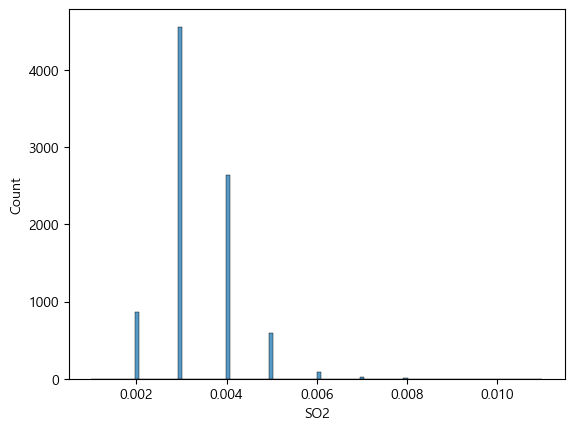

In [ ]:
# SO2
sns.histplot(df_21['SO2'])
plt.show()

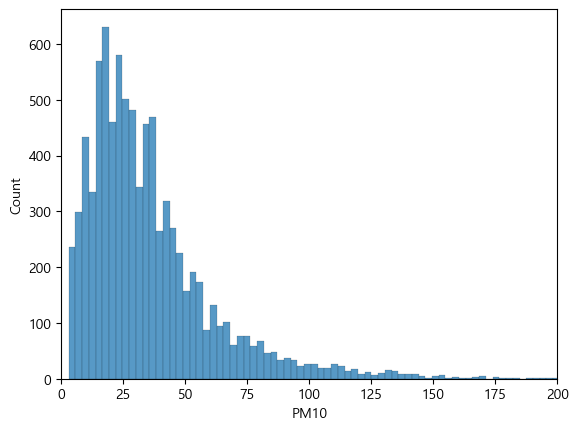

In [ ]:
# PM10
sns.histplot(df_21['PM10'])
plt.xlim(0, 200)
plt.show()

In [ ]:
df_21.head(1)

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),yesterday_PM10,PM10_1,7day_Avg_PM10,PM10_Value,PM25_Value,Rain_Value
0,0.002,0.5,0.022,0.016,24.0,14.0,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,0.0,0.0,0.0,0.0,0,2000,-6.9,-1.0,-0.8,0.3,1.6,24.0,25.0,24.0,좋음,좋음,비가 오지않음


#### **<span style="color:blue">[2-9]이변량 분석</span>**

C:\Users\user\AppData\Local\Temp\ipykernel_17200\1848767816.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_21.corr(), cmap='Blues', cbar=False, annot=True, fmt=".2f")


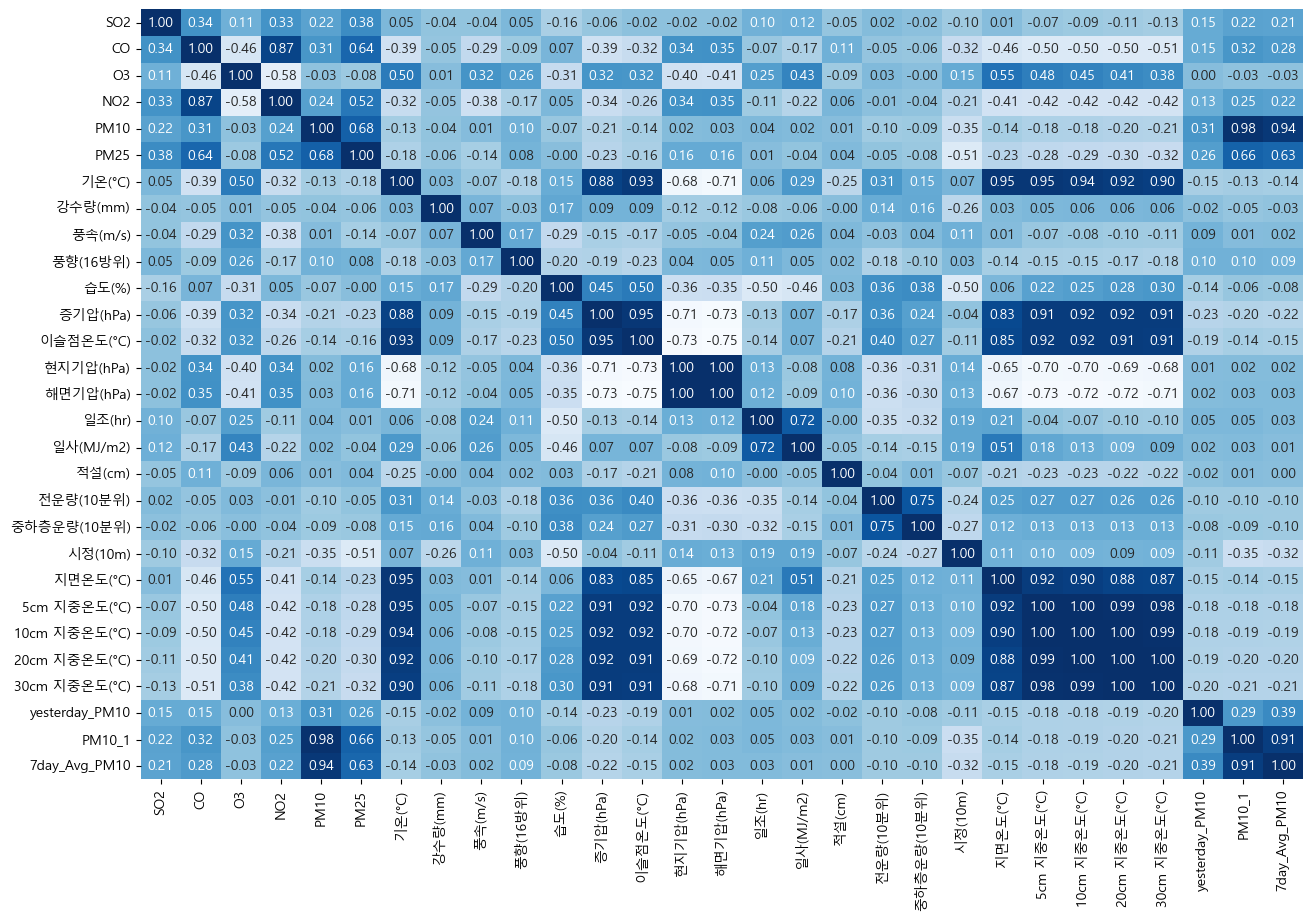

In [ ]:
# heatmap을 그려서 x축(수치형 변수) - y축(수치형 변수) 상관 계수를 알아보자

plt.figure(figsize=(15, 10))
sns.heatmap(df_21.corr(), cmap='Blues', cbar=False, annot=True, fmt=".2f")
plt.show()

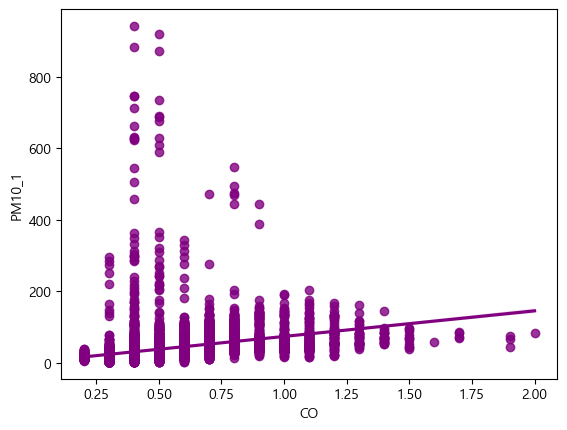

PearsonRResult(statistic=0.3161120680040188, pvalue=1.721318713572338e-202)

In [ ]:
# CO와 PM10_1 분석
sns.regplot(x=df_21['CO'], y=df_21['PM10_1'], color='purple')
plt.show()
stats.pearsonr(x=df_21['CO'], y=df_21['PM10_1'])

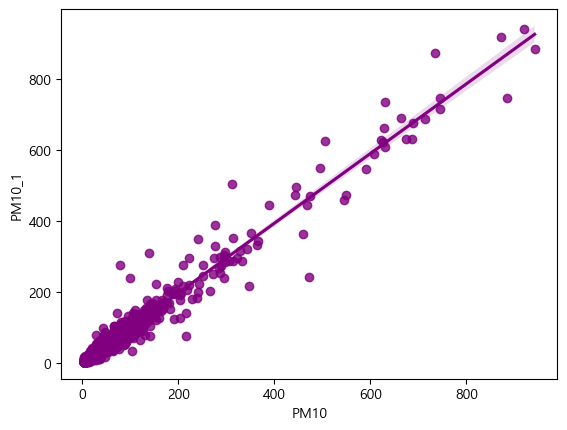

PearsonRResult(statistic=0.9820851725143437, pvalue=0.0)

In [ ]:
# PM10와 PM10_1 분석
sns.regplot(x=df_21['PM10'], y=df_21['PM10_1'], color='purple')
plt.show()
stats.pearsonr(x=df_21['PM10'], y=df_21['PM10_1'])

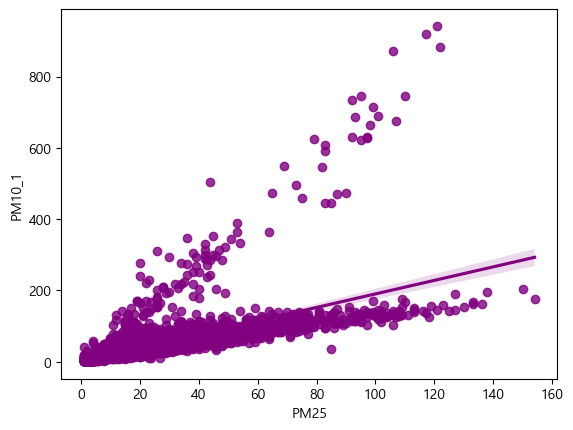

PearsonRResult(statistic=0.6640497523401349, pvalue=0.0)

In [ ]:
# PM25와 PM10_1 분석
sns.regplot(x=df_21['PM25'], y=df_21['PM10_1'], color='purple')
plt.show()
stats.pearsonr(x=df_21['PM25'], y=df_21['PM10_1'])

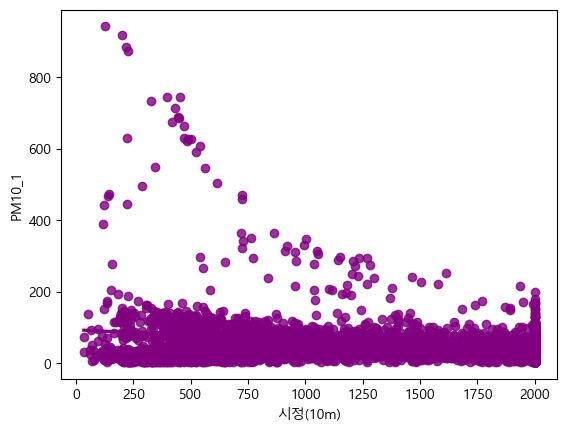

PearsonRResult(statistic=-0.3547547502525966, pvalue=4.098104739020815e-258)

In [ ]:
# 시정(10m)와 PM10_1 분석
sns.regplot(x=df_21['시정(10m)'], y=df_21['PM10_1'], color='purple')
plt.show()
stats.pearsonr(x=df_21['시정(10m)'], y=df_21['PM10_1'])

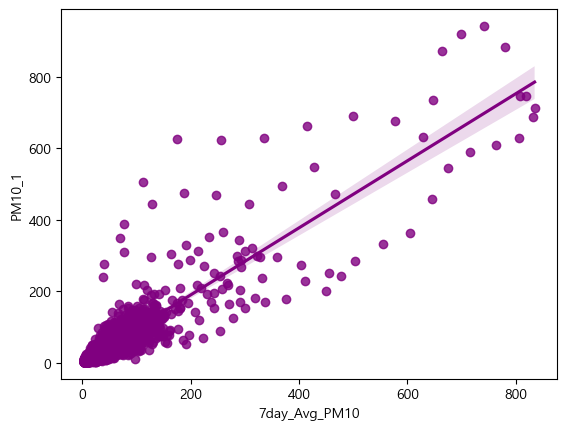

PearsonRResult(statistic=0.9067226229735692, pvalue=0.0)

In [ ]:
# 7day_Avg_PM10와 PM10_1 분석
sns.regplot(x=df_21['7day_Avg_PM10'], y=df_21['PM10_1'], color='purple')
plt.show()
stats.pearsonr(x=df_21['7day_Avg_PM10'], y=df_21['PM10_1'])

In [ ]:
df_21['Rain_Value'].unique()

array(['비가 오지않음', '가벼운 비', '보통의 비', '심한 비'], dtype=object)

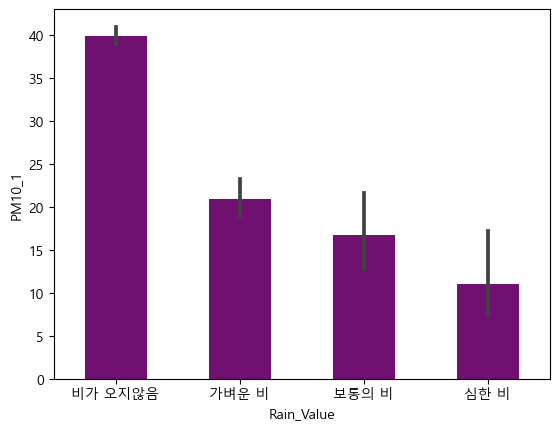

F_onewayResult(statistic=27.445474485481633, pvalue=1.1677309377153117e-17)

In [ ]:
# Rain_Value와 PM10_1 분석
sns.barplot(x=df_21['Rain_Value'], y=df_21['PM10_1'], width=0.5, color='purple')
plt.show()

r1 = df_21.loc[df_21['Rain_Value'] == '비가 오지않음', 'PM10_1']
r2 = df_21.loc[df_21['Rain_Value'] == '가벼운 비', 'PM10_1']
r3 = df_21.loc[df_21['Rain_Value'] ==  '보통의 비', 'PM10_1']
r4 = df_21.loc[df_21['Rain_Value'] == '심한 비', 'PM10_1']

display(stats.f_oneway(r1, r2, r3, r4))

#### **<span style="color:blue">[2-4] 사용하지 않을 변수 제거</span>**

* 머신러닝에 사용하지 않을 변수들을 제거해줍니다.
    * df_21, df_22에 사용할 변수들만 넣어보세요.
* time 변수를 index로 세팅하고 (set_index) 데이터가 정렬되어 있지 않으므로 index 기준으로 정렬하세요. (sort_index)

In [ ]:
df_21.head(1)

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),yesterday_PM10,PM10_1,7day_Avg_PM10,PM10_Value,PM25_Value,Rain_Value
0,0.002,0.5,0.022,0.016,24.0,14.0,-8.7,0.0,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,0.0,0.0,0.0,0.0,0,2000,-6.9,-1.0,-0.8,0.3,1.6,24.0,25.0,24.0,좋음,좋음,비가 오지않음


In [ ]:
# df_21, df_22에 사용할 변수들만 할당
df_21 = df_21[['CO', 'PM10', 'PM25', '시정(10m)', '7day_Avg_PM10', 'Rain_Value', 'PM10_1']]
df_22 = df_22[['CO', 'PM10', 'PM25', '시정(10m)', '7day_Avg_PM10', 'Rain_Value', 'PM10_1']]

In [ ]:
df_21.tail(1)

,CO,PM10,PM25,시정(10m),7day_Avg_PM10,Rain_Value,PM10_1
8758,0.4,20.0,9.0,2000,24.428571,비가 오지않음,20.0


In [ ]:
# 가변수화
df_21 = pd.get_dummies(df_21, columns=['Rain_Value'])
df_22 = pd.get_dummies(df_22, columns=['Rain_Value'])

---

#### **<span style="color:blue">[2-8] train, test 데이터 분리</span>**

* 21년도 데이터(df_21)를 train 데이터로 저장하세요. y 값을 제외하고 train_x로 저장한 후 y 값은 train_y로 저장하세요.
* 22년도 데이터(df_22)를 test 데이터로 저장하세요. y 값을 제외하고 test_x로 저장한 후 y 값은 test_y로 저장하세요.
* 각각의 데이터프레임을 csv 파일로 저장하세요. (train_x.csv / train_y.csv / test_x.csv / test_y.csv) (단, 인덱스 제외)
* y값은 'PM10_1' 즉, t+1 시점의 미세먼지 농도입니다.

In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
df_21_X = df_21.drop('PM10_1', axis=1)
df_21_Y = df_21['PM10_1']
df_22_X = df_22.drop('PM10_1', axis=1)
df_22_Y = df_22['PM10_1']

In [ ]:
# 각각의 데이터프레임을 csv 파일로 저장 (train_x.csv / train_y.csv / test_x.csv / test_y.csv)
df_21_X.to_csv('train_x.csv ', index=False)
df_21_Y.to_csv('train_y.csv ', index=False)
df_22_X.to_csv('test_x.csv ', index=False)
df_22_Y.to_csv('test_y.csv ', index=False)